In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd 
from transformers import pipeline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
# from langdetect import detect
# from langdetect.lang_detect_exception import LangDetectException
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cosine

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
df_april_reviews = pd.read_csv("data_folder/2019/april/reviews.csv")

print(df_april_reviews.columns)

df_april_reviews["comments"][0]

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


'The apartment was wonderful, fully equiped, beautiful decor, very comfortable. VERRY CLEAN!  Would stay there again or possibly another of host properties.  Close to Metro, markets, grocery store all conveniences.'

In [10]:
num_duplicates = df_april_reviews['comments'].duplicated().sum()
print(f"Number of duplicates in comments column of df_april_reviews: {num_duplicates}")

print("number of rows of df_april_reviews dataframe: ", df_april_reviews.shape[0])
print("number of rows of comments column in dataframe df_april_reviews: ", len(df_april_reviews['comments']))

num_nulls_column_comments = df_april_reviews['comments'].isna().sum()
print(f"Number of NaN or null values in Column1: {num_nulls_column_comments}")

Number of duplicates in comments column of df_april_reviews: 4663
number of rows of df_april_reviews dataframe:  287433
number of rows of comments column in dataframe df_april_reviews:  287433
Number of NaN or null values in Column1: 133


In [11]:
year_list = ["2019", "2023"]
months_list_2019 = ["febrouary", "march", "april"]
months_list_2023 = [ "march" , "june", "september" ]

df_reviews_dictionary = {}
for year in year_list:
    if year == "2019":
        for month in months_list_2019:
            df = pd.read_csv(f"data_folder/{year}/{month}/reviews.csv")
            df_reviews_dictionary[f"df_{year}_{month}_reviews"] = df
    elif year == "2023":
        for month in months_list_2023:
            df = pd.read_csv(f"data_folder/{year}/{month}/reviews.csv")
            df_reviews_dictionary[f"df_{year}_{month}_reviews"] = df

In [12]:
#checking the number of items in the dictionary. Should be 6
print(len(df_reviews_dictionary))
df_reviews_dictionary.keys() #checking if names are correct 

6


dict_keys(['df_2019_febrouary_reviews', 'df_2019_march_reviews', 'df_2019_april_reviews', 'df_2023_march_reviews', 'df_2023_june_reviews', 'df_2023_september_reviews'])

In [13]:
#checking for duplicate and NaN or null values in each dataframe column comments  

for df_name in df_reviews_dictionary:

    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['date'].duplicated().sum() ,"duplicates in date column out of ", df_reviews_dictionary[df_name]['date'].count(), "data points")
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['date'].isna().sum() ,"NaN or null values \n\n")
    
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].duplicated().sum() ,"duplicates out of ", df_reviews_dictionary[df_name]['comments'].count(), "data points")
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].isna().sum() ,"NaN or null values \n\n")
    df_reviews_dictionary[df_name] = df_reviews_dictionary[df_name].drop_duplicates(subset=['comments']).dropna(subset=['comments'])

in df_2019_febrouary_reviews dataframe where found  274015 duplicates in date column out of  276611 data points
in df_2019_febrouary_reviews dataframe where found  0 NaN or null values 


in df_2019_febrouary_reviews dataframe where found  4171 duplicates out of  276506 data points
in df_2019_febrouary_reviews dataframe where found  105 NaN or null values 


in df_2019_march_reviews dataframe where found  277203 duplicates in date column out of  279833 data points
in df_2019_march_reviews dataframe where found  0 NaN or null values 


in df_2019_march_reviews dataframe where found  4359 duplicates out of  279716 data points
in df_2019_march_reviews dataframe where found  117 NaN or null values 


in df_2019_april_reviews dataframe where found  284774 duplicates in date column out of  287433 data points
in df_2019_april_reviews dataframe where found  0 NaN or null values 


in df_2019_april_reviews dataframe where found  4663 duplicates out of  287300 data points
in df_2019_april_review

In [14]:
#checking if the duplicates where deleted 
for df_name in df_reviews_dictionary:
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].duplicated().sum() ,"duplicates out of ", df_reviews_dictionary[df_name]['comments'].count(), "data points")
    print(f"in {df_name} dataframe where found ", df_reviews_dictionary[df_name]['comments'].isna().sum() ,"NaN or null values \n\n")

in df_2019_febrouary_reviews dataframe where found  0 duplicates out of  272439 data points
in df_2019_febrouary_reviews dataframe where found  0 NaN or null values 


in df_2019_march_reviews dataframe where found  0 duplicates out of  275473 data points
in df_2019_march_reviews dataframe where found  0 NaN or null values 


in df_2019_april_reviews dataframe where found  0 duplicates out of  282769 data points
in df_2019_april_reviews dataframe where found  0 NaN or null values 


in df_2023_march_reviews dataframe where found  0 duplicates out of  521148 data points
in df_2023_march_reviews dataframe where found  0 NaN or null values 


in df_2023_june_reviews dataframe where found  0 duplicates out of  561114 data points
in df_2023_june_reviews dataframe where found  0 NaN or null values 


in df_2023_september_reviews dataframe where found  0 duplicates out of  561114 data points
in df_2023_september_reviews dataframe where found  0 NaN or null values 




In [15]:
print(df_reviews_dictionary['df_2019_febrouary_reviews']['comments'])
print("\n\n")
print(df_reviews_dictionary['df_2019_april_reviews']['comments'])
print("\n\n")

for key_name in df_reviews_dictionary:
    print("the name of the key of the dictionary: ", key_name, "\n\n")
    df_reviews_dictionary[key_name]['comments'] = df_reviews_dictionary[key_name]['comments'].apply(lambda x: str(x) if not isinstance(x, str) else x) #making sure all the comments are strings

for comment in df_reviews_dictionary['df_2019_april_reviews']['comments']:
    if '#' in comment:
        print(comment)

0         The apartment was wonderful, fully equiped, be...
1         Emmanouil was an excellent host. He provided u...
2         Manos is a very good host, he is kind and help...
3         Our stay in Emmanouil home was comfortable, qu...
4         Fantastic accommodation very well located to v...
                                ...                        
276605    The place is great and the location is as cent...
276606    Άψογη φιλοξενία.\nΤο σπίτι πεντακάθαρο και ο ο...
276608    Great location to all shopping places. Reliabl...
276609    The booking, check-in, communication and quali...
276610                                              Todo ok
Name: comments, Length: 272439, dtype: object



0         The apartment was wonderful, fully equiped, be...
1         Emmanouil was an excellent host. He provided u...
2         Manos is a very good host, he is kind and help...
3         Our stay in Emmanouil home was comfortable, qu...
4         Fantastic accommodation very well located

In [47]:
random.seed(42)
sample_size = 100
sampled_dataframes_2019_list = []
sampled_dataframes_2023_list = []

sampled_df_2019_reviews = pd.DataFrame(columns=df_reviews_dictionary['df_2019_febrouary_reviews'].columns)
sampled_df_2023_reviews = pd.DataFrame(columns=df_reviews_dictionary['df_2023_september_reviews'].columns)

for df_name in df_reviews_dictionary:
        for index, row in df_reviews_dictionary[df_name].iterrows():

            if len(sampled_df_2019_reviews) == sample_size and len(sampled_df_2023_reviews) == sample_size:
                sampled_dataframes_2019_list.append(sampled_df_2019_reviews)
                sampled_dataframes_2023_list.append(sampled_df_2023_reviews)
                break
            
            seed_value = random.randint(0, 300)
            if '2019' in df_name:
                if len(sampled_df_2019_reviews) < sample_size:
                    comment = row['comments']
                    try:
                        comm = detect(comment)
                        if comm == 'en':
                            if seed_value % 2 == 0:
                                sampled_df_2019_reviews = sampled_df_2019_reviews._append(row, ignore_index=True) 
                    except LangDetectException as e:
                        print(f"Language detection failed for '{comment}': {e}")
            else:
                if len(sampled_df_2023_reviews) < sample_size:
                    comment = row['comments']
                    try:
                        comm = detect(comment)
                        if detect(row['comments']) == 'en':
                            if seed_value % 2 == 0:
                                sampled_df_2023_reviews = sampled_df_2023_reviews._append(row, ignore_index=True) 
                    except LangDetectException as e:
                        print(f"Language detection failed for '{comment}': {e}")

#checking if lists have forseen number of elements
print(len(sampled_dataframes_2019_list), "\n\n")
print(len(sampled_dataframes_2023_list))

#checking if the full sampled dataframes have the foreseen number of rows and columns
print(sampled_df_2019_reviews.shape[0], "\n\n")
print(sampled_df_2023_reviews.shape[0], "\n\n")

3 


3
100 


100 




In [48]:
sampled_full_df_2019_reviews = pd.concat(sampled_dataframes_2019_list, ignore_index=True)
sampled_full_df_2023_reviews = pd.concat(sampled_dataframes_2023_list, ignore_index=True)

#checking if the full sampled dataframes have the foreseen number of rows and columns
print(sampled_full_df_2019_reviews.shape, "\n\n")
print(sampled_full_df_2023_reviews.shape, "\n\n")


(300, 6) 


(300, 6) 




In [79]:
import numbers

url_pattern = re.compile(r'https?://\S+|www\.\S+')

emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)

emoticon_pattern = r'[:;=8][-o*\'`^]?[)\]dD\}>]|[(:;=8][-o*\'`^]?[(\[{<]|<3|:P|:p|:O|:o|:X|:x|:S|:s'

stop_words = set(stopwords.words('english'))

# Function to preprocess a comment
def preprocess_comment(comment):

    if isinstance(comment, numbers.Number):
        comment = str(comment)

    # Convert to lowercase
    comment = comment.lower()
    comment = re.sub(emoticon_pattern, '', comment)
    # Remove URLs
    comment = url_pattern.sub('', comment)
    # Remove emojis and emoticons
    comment = emoji_pattern.sub('', comment)
    # Remove punctuation marks except exclamation mark
    comment = ''.join([char if char == '!' or char not in string.punctuation else ' ' for char in comment])
    # Tokenize the comment
    tokens = nltk.word_tokenize(comment)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    cleaned_comment = ' '.join(tokens)

    return cleaned_comment


# Apply the function to each comment
sampled_full_df_2019_reviews['comments'] = sampled_full_df_2019_reviews['comments'].apply(preprocess_comment)
sampled_full_df_2023_reviews['comments'] = sampled_full_df_2023_reviews['comments'].apply(preprocess_comment)

print(sampled_full_df_2019_reviews.head(), "\n\n", sampled_full_df_2019_reviews.shape)
print(sampled_full_df_2023_reviews.head(), "\n\n", sampled_full_df_2023_reviews.shape)

  listing_id        id        date reviewer_id reviewer_name  \
0      10595   1994237  2012-08-15      289831        Andrey   
1      10595   4678609  2013-05-20     2635427         Ahmet   
2      10595  19482948  2014-09-13     6737784       Mariana   
3      10595  32403740  2015-05-17    18119354         Luisa   
4      10595  48058154  2015-09-23    19495001        Eileen   

                                            comments  
0  emmanouil excellent host provided us everythin...  
1  manos good host kind helpful apartments spacio...  
2  fantastic accommodation well located visit ath...  
3  manos amazing host ! start polite arrived late...  
4  apartment exactly described comfortable clean ...   

 (300, 6)
  listing_id        id        date reviewer_id reviewer_name  \
0      10595   1994237  2012-08-15      289831        Andrey   
1      10595   4678609  2013-05-20     2635427         Ahmet   
2    1708578   9063055  2013-12-03     4985212         Maxim   
3    1708578  124

In [62]:
#sentiment analysis 
classifier = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True)

fully_sampled_2019_comments_list = sampled_full_df_2019_reviews['comments'].tolist()
fully_sampled_2023_comments_list = sampled_full_df_2023_reviews['comments'].tolist()

classifier_res_2019 = classifier(fully_sampled_2019_comments_list)
classifier_res_2023 = classifier(fully_sampled_2023_comments_list)

# sampled_full_df_2019_reviews['sentiment'] = sampled_full_df_2019_reviews['comments'].apply(lambda x: classifier(x)[0]['label'])

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\user\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.

In [90]:
print(len(classifier_res_2019), "\n\n",len(classifier_res_2023), "\n\n")
[print(element) for element in classifier_res_2019]

300 

 300 


[{'label': 'negative', 'score': 0.0001294831745326519}, {'label': 'neutral', 'score': 0.0007904635858722031}, {'label': 'positive', 'score': 0.9990800619125366}]
[{'label': 'negative', 'score': 0.00015020415594335645}, {'label': 'neutral', 'score': 0.0008036898798309267}, {'label': 'positive', 'score': 0.9990461468696594}]
[{'label': 'negative', 'score': 0.00013030476111453027}, {'label': 'neutral', 'score': 0.0005442865076474845}, {'label': 'positive', 'score': 0.9993253946304321}]
[{'label': 'negative', 'score': 0.00014154714881442487}, {'label': 'neutral', 'score': 0.0006209500133991241}, {'label': 'positive', 'score': 0.9992375373840332}]
[{'label': 'negative', 'score': 0.0002879502426367253}, {'label': 'neutral', 'score': 0.009764897637069225}, {'label': 'positive', 'score': 0.9899471402168274}]
[{'label': 'negative', 'score': 0.0003685495466925204}, {'label': 'neutral', 'score': 0.003198621328920126}, {'label': 'positive', 'score': 0.9964327812194824}]
[{'label': 'n

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [88]:
# Extract all scores
sentiment_labels_2019 = [item['label'] for element in classifier_res_2019 for item in element]
print("sentiment_labels_2019 list length: ", len(sentiment_labels_2019), "\n\n")
sentiment_labels_2023 = [item['label'] for element in classifier_res_2023 for item in element]
print("sentiment_labels_2023 list length: ", len(sentiment_labels_2023), "\n\n")

# Create DataFrame with a single column named 'score'
df_sentiment_2019 = pd.DataFrame(sentiment_labels_2019, columns=['sentiment'])
df_sentiment_2023 = pd.DataFrame(sentiment_labels_2023, columns=['sentiment'])

print(df_sentiment_2019, "\n\n")
print(df_sentiment_2023)

sentiment_labels_2019 list length:  900 


sentiment_labels_2023 list length:  900 


    sentiment
0    negative
1     neutral
2    positive
3    negative
4     neutral
..        ...
895   neutral
896  positive
897  negative
898   neutral
899  positive

[900 rows x 1 columns] 


    sentiment
0    negative
1     neutral
2    positive
3    negative
4     neutral
..        ...
895   neutral
896  positive
897  negative
898   neutral
899  positive

[900 rows x 1 columns]


In [64]:
complete_sentiment_df_2019 = pd.concat([sampled_full_df_2019_reviews[['listing_id', 'date', 'comments']], df_sentiment_2019[['sentiment']]], axis=1)
complete_sentiment_df_2019 = complete_sentiment_df_2019.rename(columns={'comments': 'reviews'})
complete_sentiment_df_2023 = pd.concat([sampled_full_df_2023_reviews[['listing_id', 'date', 'comments']], df_sentiment_2023[['sentiment']]], axis=1)
complete_sentiment_df_2023 = complete_sentiment_df_2023.rename(columns={'comments': 'reviews'})

print(complete_sentiment_df_2019.columns, "\n\n")
print(complete_sentiment_df_2019['date'], "\n\n")
print(complete_sentiment_df_2023.columns)

Index(['listing_id', 'date', 'reviews', 'sentiment'], dtype='object') 


0      2012-08-15
1      2013-05-20
2      2014-09-13
3      2015-05-17
4      2015-09-23
          ...    
895           NaN
896           NaN
897           NaN
898           NaN
899           NaN
Name: date, Length: 900, dtype: object 


Index(['listing_id', 'date', 'reviews', 'sentiment'], dtype='object')



Grouped DataFrame with counts:
      year sentiment  counts
0   2010.0  negative       1
1   2010.0   neutral       1
2   2010.0  positive       1
3   2012.0  negative      23
4   2012.0   neutral      23
5   2012.0  positive      23
6   2013.0  negative      21
7   2013.0   neutral      21
8   2013.0  positive      21
9   2014.0  negative       7
10  2014.0   neutral       7
11  2014.0  positive       7
12  2015.0  negative      29
13  2015.0   neutral      29
14  2015.0  positive      29
15  2016.0  negative      16
16  2016.0   neutral      16
17  2016.0  positive      16
18  2017.0  negative       1
19  2017.0   neutral       1
20  2017.0  positive       1
21  2018.0  negative       1
22  2018.0   neutral       1
23  2018.0  positive       1
24  2019.0  negative       1
25  2019.0   neutral       1
26  2019.0  positive       1


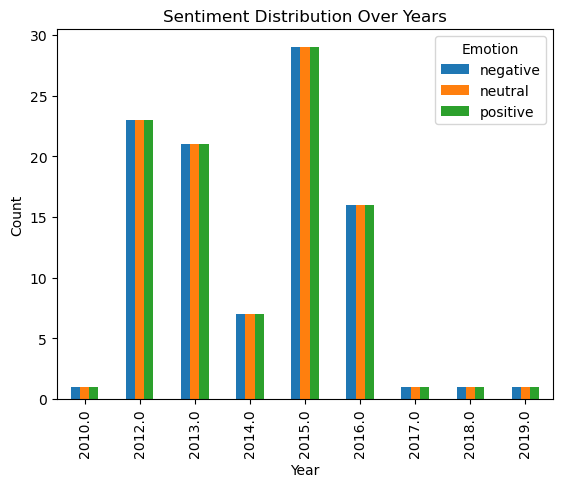


Grouped DataFrame with counts:
      year sentiment  counts
0   2012.0  negative       3
1   2012.0   neutral       3
2   2012.0  positive       3
3   2013.0  negative      13
4   2013.0   neutral      13
5   2013.0  positive      13
6   2014.0  negative      37
7   2014.0   neutral      37
8   2014.0  positive      37
9   2015.0  negative      10
10  2015.0   neutral      10
11  2015.0  positive      10
12  2016.0  negative       2
13  2016.0   neutral       2
14  2016.0  positive       2
15  2017.0  negative       5
16  2017.0   neutral       5
17  2017.0  positive       5
18  2018.0  negative       6
19  2018.0   neutral       6
20  2018.0  positive       6
21  2019.0  negative      12
22  2019.0   neutral      12
23  2019.0  positive      12
24  2021.0  negative       3
25  2021.0   neutral       3
26  2021.0  positive       3
27  2022.0  negative       9
28  2022.0   neutral       9
29  2022.0  positive       9


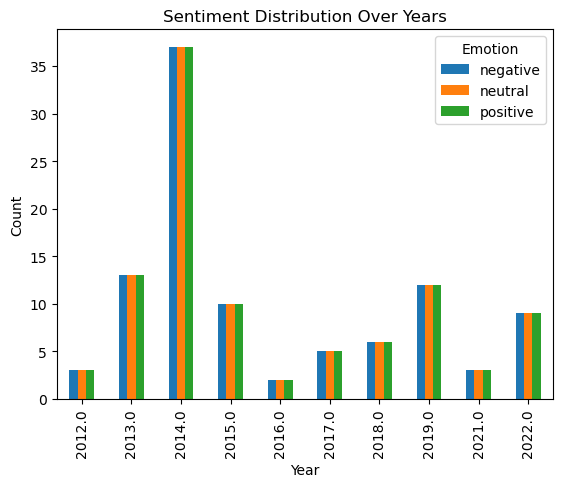

In [78]:
complete_sentiment_df_2019['date'] = pd.to_datetime(complete_sentiment_df_2019['date'])
complete_sentiment_df_2023['date'] = pd.to_datetime(complete_sentiment_df_2023['date'])

complete_sentiment_df_2019_cp = complete_sentiment_df_2019.copy()
complete_sentiment_df_2023_cp = complete_sentiment_df_2023.copy()

complete_sentiment_df_2019_cp['year'] = complete_sentiment_df_2019_cp['date'].dt.year
complete_sentiment_df_2023_cp['year'] = complete_sentiment_df_2023_cp['date'].dt.year

# Group by year and sentiment, then get the counts
emotion_counts = complete_sentiment_df_2019_cp.groupby(['year', 'sentiment']).size().reset_index(name='counts')
print("\nGrouped DataFrame with counts:")
print(emotion_counts)

pivot_df = emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0)

# Plot
pivot_df.plot(kind='bar')
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()


emotion_counts = complete_sentiment_df_2023_cp.groupby(['year', 'sentiment']).size().reset_index(name='counts')
print("\nGrouped DataFrame with counts:")
print(emotion_counts)

pivot_df = emotion_counts.pivot(index='year', columns='sentiment', values='counts').fillna(0)

# Plot
pivot_df.plot(kind='bar')
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()

In [23]:
df_listings_2019_april = pd.read_csv(f"data_folder/2019/april/listings.csv")
df_listings_2019_febrouary = pd.read_csv(f"data_folder/2019/febrouary/listings.csv")
df_listings_2019_march = pd.read_csv(f"data_folder/2019/march/listings.csv")

df_listings_2019 = pd.concat([df_listings_2019_april,df_listings_2019_febrouary, df_listings_2019_march])

df_listings_2023_june = pd.read_csv(f"data_folder/2023/june/listings.csv")
df_listings_2023_march = pd.read_csv(f"data_folder/2023/march/listings.csv")
df_listings_2023_september = pd.read_csv(f"data_folder/2023/september/listings.csv")

df_listings_2023 = pd.concat([df_listings_2023_september, df_listings_2023_march, df_listings_2023_september])

print(df_listings_2019.shape)

C:\Users\user\AppData\Local\Temp\ipykernel_12492\2969571231.py:1: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_2019_april = pd.read_csv(f"data_folder/2019/april/listings.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_12492\2969571231.py:2: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_2019_febrouary = pd.read_csv(f"data_folder/2019/febrouary/listings.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_12492\2969571231.py:3: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_2019_march = pd.read_csv(f"data_folder/2019/march/listings.csv")


(28122, 106)


In [24]:
complete_sentiment_df_2019_cp['neighbourhood'] = None
complete_sentiment_df_2023_cp['neighbourhood'] = None

# print(complete_sentiment_df_2019_cp.head())
# print(complete_sentiment_df_2023_cp.head())

print(df_listings_2019['id'].isna().sum())
print(df_listings_2019['id'].duplicated().sum())
df_listings_2019 = df_listings_2019.drop_duplicates(subset=['id'], keep=False)
# print(df_listings_2019['id'].duplicated().sum())
print(df_listings_2019.shape)


0
17737
(1076, 106)


In [25]:
for index1, row1 in complete_sentiment_df_2019_cp.iterrows():
    for index2, row2 in df_listings_2019.iterrows():
        if row1['listing_id'] == row2['id']:
            print("\n\n here \n\n")
            complete_sentiment_df_2019.loc[index1, 'neighbourhood'] = row2['neighbourhood']

In [26]:
print(complete_sentiment_df_2019_cp['neighbourhood'].isna().sum())

900


In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

# 3ο ΕΡΩΤΗΜΑ

In [39]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
C:\Users\user/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [45]:
from gensim.models import KeyedVectors

model_path = r'C:\Users\user/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)


[('kings', 0.7138046622276306), ('queen', 0.6510956287384033), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797566771507263), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [55]:
complete_sentiment_df_2019_cp.columns

Index(['listing_id', 'date', 'reviews', 'sentiment', 'year'], dtype='object')

In [95]:
# #θελει ενα ακομα τσεκ δεν ειμαι σιγουρος 
# def get_comment_vector(comment, model): 

    
#     if isinstance(comment, numbers.Number):
#         comment = str(comment)
        
#     words = comment.split()
#     valid_words = [word for word in words if word in model]
    
#     if not valid_words:
#         return np.zeros(model.vector_size)
    
#     word_vectors = np.array([model[word] for word in valid_words])
#     return np.mean(word_vectors, axis=0)

# def cosine_similarity(vec1, vec2):
#     return 1 - cosine(vec1, vec2)

# def calculate_similarity(df, model):
    
#     df['vector'] = df['reviews'].apply(lambda x: get_comment_vector(x, model))
#     num_comments = len(df)
#     similarity_matrix = np.zeros((num_comments, num_comments))
    
#     for i in range(num_comments):
#         for j in range(i, num_comments):
#             similarity = cosine_similarity(df['vector'][i], df['vector'][j])
#             similarity_matrix[i, j] = similarity
#             similarity_matrix[j, i] = similarity
    
#     return pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)


# # Calculate similarity
# similarity_df = calculate_similarity(complete_sentiment_df_2019_cp, model)

# print(similarity_df.head(300))

def calculate_word_vector(w, emb_model):
    if w in emb_model:
        return emb_model[w]
    else:
        return np.zeros(emb_model.vector_size)

def calculate_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

def calculate_similarity(w1, w2, emb_model):
    
    vec1 = calculate_word_vector(w1, emb_model)
    vec2 = calculate_word_vector(w2, emb_model)
    
    return calculate_cosine_similarity(vec1, vec2)

# Example usage
word1 = "king"
word2 = "queen"

similarity = calculate_similarity(word1, word2, model)
print(f"The similarity between '{word1}' and '{word2}' is: {similarity:.4f}")


The similarity between 'king' and 'queen' is: 0.6511


In [96]:
def get_neighborhood(word, model, N):
    
    if word in model:
        return model.most_similar(word, topn=N)
    else:
        return []

def get_combined_neighborhood(word1, word2, model, N):
   
    neighborhood1 = get_neighborhood(word1, model, N)
    neighborhood2 = get_neighborhood(word2, model, N)
    
    combined_neighborhood = neighborhood1 + neighborhood2
    combined_neighborhood = sorted(combined_neighborhood, key=lambda x: x[1], reverse=True)
    
    # Optionally, remove duplicates and keep only top N unique words
    seen = set()
    unique_combined_neighborhood = []
    for word, score in combined_neighborhood:
        if word not in seen:
            seen.add(word)
            unique_combined_neighborhood.append((word, score))
            if len(unique_combined_neighborhood) == N:
                break
    
    return unique_combined_neighborhood

word1 = "king"
word2 = "queen"
N = 10

# Get the combined semantic neighborhood
combined_neighborhood = get_combined_neighborhood(word1, word2, model, N)

# Print the results
print("Combined Semantic Neighborhood for '{}' and '{}':".format(word1, word2))
for word, similarity in combined_neighborhood:
    print(f"{word}: {similarity:.4f}")

Combined Semantic Neighborhood for 'king' and 'queen':
queens: 0.7399
kings: 0.7138
princess: 0.7071
king: 0.6511
queen: 0.6511
monarch: 0.6413
very_pampered_McElhatton: 0.6357
crown_prince: 0.6204
Queen: 0.6163
prince: 0.6160


In [74]:
def calculate_neighborhood(word, emb_model, N):
  
    if word in emb_model:
        return emb_model.most_similar(word, topn=N)
    else:
        return []

def calculate_similarity(word1, word2, emb_model):
   
    if word1 in emb_model and word2 in emb_model:
        return emb_model.similarity(word1, word2)
    else:
        return 0.0

def calculate_max_similarity(nei1, nei2, emb_model):
   
    max_similarity = 0.0
    for word1, _ in nei1:
        for word2, _ in nei2:
            similarity = calculate_similarity(word1, word2, emb_model)
            if similarity > max_similarity:
                max_similarity = similarity
    return max_similarity

def correlation_of_similarities(nei1, nei2):
    
    sims1 = [similarity for _, similarity in nei1]
    sims2 = [similarity for _, similarity in nei2]
    if len(sims1) != len(sims2):
        return 0.0
    correlation = np.corrcoef(sims1, sims2)[0, 1]
    return correlation

def sum_of_squared_similarities(nei1, nei2, emb_model):
   
    sum_squared_sim = 0.0
    for word1, _ in nei1:
        for word2, _ in nei2:
            sim = calculate_similarity(word1, word2, emb_model)
            sum_squared_sim += sim ** 2
    return sum_squared_sim


# Words to find the semantic neighborhood for
word1 = "king"
word2 = "queen"
word3 = "man"
N = 10

# Get the neighborhoods
neighborhood1 = calculate_neighborhood(word1, model, N)
neighborhood2 = get_neighborhood(word2, model, N)
neighborhood3 = get_neighborhood(word3, model, N)

# Calculate the similarities
max_similarityy = calculate_max_similarity(neighborhood1, neighborhood2, model)
correlation_similarityy = correlation_of_similarities(neighborhood1, neighborhood2)
sum_squared_similarityy = sum_of_squared_similarities(neighborhood1, neighborhood2, model)

print(f"Max similarity between neighborhoods of '{word1}' and '{word2}': {max_similarityy:.4f}")
print(f"Correlation of similarities between neighborhoods of '{word1}' and '{word2}': {correlation_similarityy:.4f}")
print(f"Sum of squared similarities between neighborhoods of '{word1}' and '{word2}': {sum_squared_similarityy:.4f}")


Max similarity between neighborhoods of 'king' and 'queen': 1.0000
Correlation of similarities between neighborhoods of 'king' and 'queen': 0.9674
Sum of squared similarities between neighborhoods of 'king' and 'queen': 24.9703


# 2o ΕΡΩΤΗΜΑ